In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('table_missing.csv')
df.head() 

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-


# 缺失值观测

## 缺失信息概览

In [4]:
# info()函数查看缺失信息
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    31 non-null     object 
 2   ID       29 non-null     float64
 3   Gender   28 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   22 non-null     float64
 7   Math     30 non-null     float64
 8   Physics  31 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ KB


In [25]:
# 查看每列/每个属性有多少缺失值，以及对应的确实比例

missing_value = df.isnull().sum().sort_values()
missing_rate = missing_value / len(df) * 100
missing_df = pd.concat([missing_value, missing_rate], axis=1)
missing_df = missing_info.rename(columns={
    0: "missing_value",
    1: "missing_rate"
})
missing_df

,missing_value,missing_rate
School,0,0.000000
Address,0,0.000000
Height,0,0.000000
Class,4,11.428571
Physics,4,11.428571
Math,5,14.285714
ID,6,17.142857
Gender,7,20.000000
Weight,13,37.142857


In [34]:
# 查看缺失值所在的行
weight_nan=df[df.Weight.isna()]   
print(weight_nan)
# 返回的结果中，Wight 所在的列值全为NaN，对应的下标也可以找到
print("属性Weight缺失值所在的下标：")
missing_index=df[df.Weight.isna()].index.tolist()    
print(missing_index)

   School Class      ID Gender   Address  Height  Weight  Math Physics
0     S_1   C_1     NaN      M  street_1     173     NaN  34.0      A+
1     S_1   C_1     NaN      F  street_2     192     NaN  32.5      B+
2     S_1   C_1  1103.0      M  street_2     186     NaN  87.2      B+
9     S_1   C_2  1205.0    NaN  street_6     167     NaN  68.4      B-
11    S_1   NaN  1302.0      F  street_1     175     NaN  87.7      A-
16    S_2   C_1  2102.0      F  street_6     161     NaN  50.6      B+
19    S_2   C_1  2105.0      M  street_4     170     NaN  34.2       A
20    S_2   C_2  2201.0      M  street_5     193     NaN   NaN       B
30    S_2   C_4  2401.0      F  street_2     159     NaN  45.3       A
31    S_2   C_4  2402.0      M  street_7     166     NaN  48.7       B
32    S_2   C_4  2403.0    NaN  street_6     158     NaN  59.7      B+
33    S_2   C_4  2404.0    NaN  street_2     160     NaN  67.7       B
34    S_2   C_4  2405.0    NaN  street_6     193     NaN  47.6       B
属性Weig

In [29]:
# 找出所有不含有缺失值的列
df[df.notna().all(1)]

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
12,S_1,C_3,1303.0,M,street_7,188,82.0,49.7,B
17,S_2,C_1,2103.0,M,street_4,157,61.0,52.5,B-
21,S_2,C_2,2202.0,F,street_7,194,77.0,68.5,B+
25,S_2,C_3,2301.0,F,street_4,157,78.0,72.3,B+
27,S_2,C_3,2303.0,F,street_7,190,99.0,65.9,C
28,S_2,C_3,2304.0,F,street_6,164,81.0,95.5,A-
29,S_2,C_3,2305.0,M,street_4,187,73.0,48.9,B


## 三种缺失值符号


np.nan 不等于任何，也不等于自身

In [35]:
print(np.nan == np.nan)
print(np.nan == 0)
print(np.nan == None)

False
False
False


In [36]:
# 在用equals函数比较时，自动略过两侧全是np.nan的单元格，因此结果不会影响
df.equals(df)

True

In [40]:
# 读入数据集时，只要列中含有缺失值，数据类型会变为  float
print(type(np.nan))
print(pd.Series([1,2,3]).dtype)
print(pd.Series([1,np.nan,3]).dtype)

<class 'float'>
int64
float64


In [42]:
# 对于布尔类型的列表，如果是np.nan填充，那么它的值会自动变为True而不是False
pd.Series([1, np.nan, 3], dtype='bool')

0    True
1    True
2    True
dtype: bool

In [2]:
# 当修改一个布尔列表时，会改变列表类型，而不是赋值为True
s = pd.Series([True, False], dtype='bool')
s[1] = np.nan  
s   

0    1.0
1    NaN
dtype: float64

In [7]:
# 在所有的表格读取后，无论列是存放什么类型的数据，默认的缺失值全为np.nan类型
# 因此整型列转为浮点；而字符由于无法转化为浮点，因此只能归并为object类型（'O'），原来是浮点型的则类型不变
print(df['ID'].dtype)
print(df['Math'].dtype)
print(df['Class'].dtype)

float64
float64
object


In [10]:
# None 等于自身
print(None == None)
# 布尔值为False
print(pd.Series([None], dtype='bool'))
# 修改布尔值不会改变数据类型
s = pd.Series([True, False], dtype='bool')
s[0] = None
s

True
0    False
dtype: bool


0    False
1    False
dtype: bool

In [11]:
s = pd.Series([1, 0], dtype='bool')
s[0] = None
s

0    False
1    False
dtype: bool

In [12]:
# 传入数据类型后，会自动变为np.nan 
type(pd.Series([1,None])[1])   

numpy.float64

In [13]:
type(pd.Series([1, None], dtype='O')[1])

NoneType

In [14]:
# 在使用equals函数时下面的情况下返回False
pd.Series([None]).equals(pd.Series([np.nan]))

False

In [16]:
# NaT
# NaT是针对时间序列的缺失值，是Pandas的内置类型，可以完全看做时序版本的np.nan，与自己不等，且使用equals是也会被跳过
s_time = pd.Series([pd.Timestamp('20120101')] * 5)
s_time

0   2012-01-01
1   2012-01-01
2   2012-01-01
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [17]:
s_time[2] = None
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [18]:
s_time[2] = np.nan
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [20]:
type(s_time[2])

pandas._libs.tslibs.nattype.NaTType

In [22]:
print(s_time[2]==s_time[2])

print(s_time.equals(s_time))

False
True


## Nubble类型与NA符号

Nubble的引入，统一了缺失值处理方法


# 缺失数据的运算与分组  


## 加号与乘号运算规则

使用加法时，缺失值为0

使用乘法时，缺失值为1

使用累计函数时，缺失值自动略过

## groupby方法中的缺失值



In [26]:
# 动忽略为缺失值的组
df_g = pd.DataFrame({
    'one': ['A', 'B', 'C', 'D', np.nan],
    'two': np.random.randn(5)
})
print(df_g)
df_g = pd.DataFrame({
    'one': ['A', 'B', 'C', 'D', np.nan],
    'two': np.random.randn(5)
})
df_g

   one       two
0    A  0.602094
1    B  1.456766
2    C -0.269268
3    D  0.654397
4  NaN -0.701532


,one,two
0,A,-1.102280
1,B,0.484565
2,C,0.767298
3,D,-1.277191
4,NaN,-1.245122


# 缺失值简单填充与删除

## 内置函数--fillna方法



In [27]:
# 值填充与前后向填充（分别与ffill方法和bfill方法等价   
df['Physics'].fillna('missing').head()

0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: object

In [29]:
# 向前填充
df['Physics'].fillna(method='ffill').head()

0    A+
1    B+
2    B+
3    B+
4    A-
Name: Physics, dtype: object

In [30]:
# 向后填充
df['Physics'].fillna(method='backfill').head()

0    A+
1    B+
2    B+
3    A-
4    A-
Name: Physics, dtype: object

In [32]:
# 填充中的对齐特性  --返回结果特性一致
df_f = pd.DataFrame({
    'A': [1, 3, np.nan],
    'B': [2, 4, np.nan],
    'C': [3, 5, np.nan]
})
df_f.fillna(df_f.mean())

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,4.0


In [33]:
# 返回的结果中没有C，根据对齐特点不会被填充
df_f.fillna(df_f.mean()[['A', 'B']])

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,NaN


## 缺失值删除方法--dropna()函数

In [34]:
df_d = pd.DataFrame({
    'A': [np.nan, np.nan, np.nan],
    'B': [np.nan, 3, 2],
    'C': [3, 2, 1]
})
df_d

,A,B,C
0,NaN,NaN,3
1,NaN,3.0,2
2,NaN,2.0,1


In [35]:
# 删除含有缺失值的所有行   axis=0
df_d.dropna(axis=0)

,A,B,C


In [37]:
# 删除含有缺失值的所有列    axis=1
df_d.dropna(axis=1)
# 只有特征C没有缺失值   特征 A，B列都被删除

,C
0,3
1,2
2,1


In [39]:
# how参数（可以选all或者any，表示全为缺失去除和存在缺失去除）

df_d.dropna(axis=1, how='all')

,B,C
0,NaN,3
1,3.0,2
2,2.0,1


In [40]:
# subset参数（即在某一组列范围中搜索缺失值）
df_d.dropna(axis=0, subset=['B', 'C'])

,A,B,C
1,NaN,3.0,2
2,NaN,2.0,1


In [44]:
# 删除缺失超过阈值的缺失值所在行
miss_rate_threshold = 0.25
missing_columns = []


def miss_rate_count(df, miss_rate_threshold):
    for column in df.columns:
        if sum(pd.isnull(df[column])) / len(df) >= miss_rate_threshold:
            missing_columns.append(column)

    return missing_columns



miss_rate_count(df,0.25)

['Weight']

# 插值方法interpolation

简单线性插值

线性插值



## 简单线性插值

In [45]:
s = pd.Series([1, 10, 15, -5, -2, np.nan, np.nan, 28])
s 

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [48]:
# 与索引无关的线性插值 
# 默认状态下，interpolate会对缺失的值进行线性插值
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

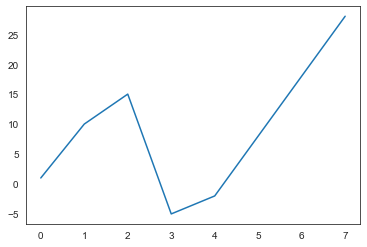

In [52]:
s.interpolate().plot()
sns.set_style('whitegrid')

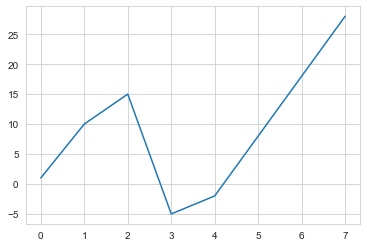

In [53]:
# 与线性有关的线性插值
# method中的index和time选项可以使插值线性地依赖索引，即插值为索引的线性函数
s.interpolate(method='index').plot()
#可以看到与上面的区别

In [54]:
# 如果索引是时间，那么可以按照时间长短插值
s_t = pd.Series([0, np.nan, 10],
                index=[
                    pd.Timestamp('2012-05-01'),
                    pd.Timestamp('2012-05-07'),
                    pd.Timestamp('2012-06-03')
                ])
s_t

2012-05-01     0.0
2012-05-07     NaN
2012-06-03    10.0
dtype: float64

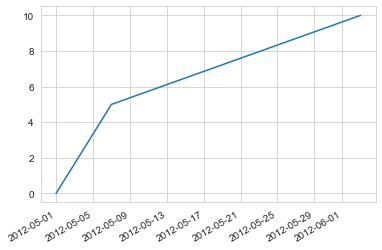

In [56]:
s_t.interpolate().plot()

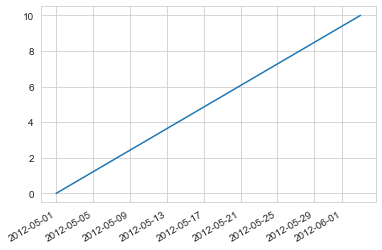

In [57]:
# 按照时间长短进行差值

s_t.interpolate(method='time').plot()

## 线性插值

样条插值、多项式插值、阿基玛插值等


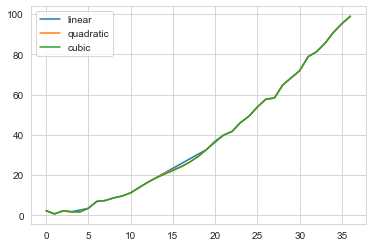

In [59]:
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

## interpolate中的限制参数

In [60]:
# limit表示最多插入多少个

s = pd.Series([1, np.nan, np.nan, np.nan, 5])
s.interpolate(limit=2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [61]:
# limit_direction表示插值方向，可选forward,backward,both，默认前向
s = pd.Series([
    np.nan,
    np.nan,
    1,
    np.nan,
    np.nan,
    np.nan,
    5,
    np.nan,
    np.nan,
])
s.interpolate(limit_direction='backward')

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [62]:
# limit_area表示插值区域，可选inside,outside，默认None

s = pd.Series([
    np.nan,
    np.nan,
    1,
    np.nan,
    np.nan,
    np.nan,
    5,
    np.nan,
    np.nan,
])
s.interpolate(limit_area='inside')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [63]:
s = pd.Series([
    np.nan,
    np.nan,
    1,
    np.nan,
    np.nan,
    np.nan,
    5,
    np.nan,
    np.nan,
])
s.interpolate(limit_area='outside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
dtype: float64

# 算法预测填充缺失值

knn 

随机森林

## knn

KNN预测的步骤是选择出其他不存在缺失值的列，同时去除掉需要预测缺失值的列存在缺失值的行，然后计算距离。
如果缺失值是离散的，使用K近邻分类器，投票选出K个邻居中最多的类别进行填补；如果为连续变量，则用K近邻回归器，拿K个邻居中该变量的平均值填补。

In [ ]:
# pip install fancyimpute

## 随机森林回归  填充缺失值

(506, 13)
3289


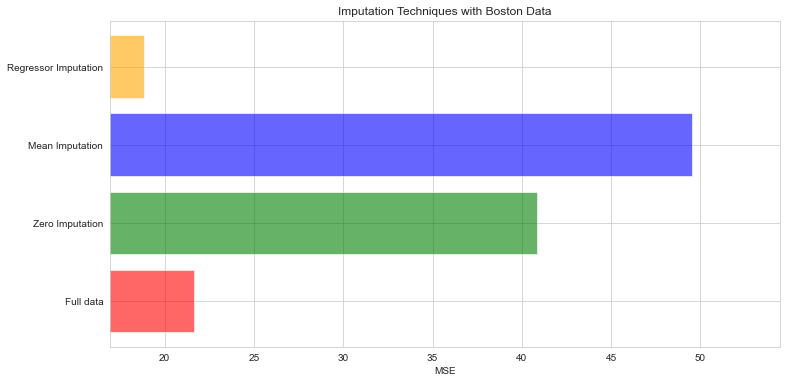

In [64]:
# 导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer

# 以波士顿数据集为例，导入完整的数据集并探索
dataset = load_boston()
print(dataset.data.shape)

X_full, y_full = dataset.data, dataset.target  # 赋值

n_samples = X_full.shape[0]  # 506
n_features = X_full.shape[1]  # 13

# 为完整数据集放入缺失
# 首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# np.floor向下取整，返回.0格式的浮点数
print(n_missing_samples)

# 所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
# 如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可
# 以利用索引来为数据中的任意3289个位置赋空值
# 然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0, n_features,
                               n_missing_samples)  # 生成随机3289个列索引
missing_samples = rng.randint(0, n_samples, n_missing_samples)  # 随机生成3289个行索引

#missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
# 我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果我们需要
# 的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，
# 因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中

X_missing = X_full.copy()  # 注意copy()和deepcopy()区别
y_missing = y_full.copy()

# 生成506条数据并将3289处更新为 NAN 值
X_missing[missing_samples, missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)

# 转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如pandas来得好用

# 使用0和均值填补缺失值

# 使用均值进行填补

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)

# 使用0进行填补

imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",
                      fill_value=0)  # constant-常数
X_missing_0 = imp_0.fit_transform(X_missing)

X_missing_reg = X_missing.copy()
sortindex = np.argsort(
    X_missing_reg.isnull().sum(axis=0)).values  # np.argsort()返回的是数组值从小到大的索引值
sortindex

for i in sortindex:  # sortindex是按缺失值数据量从小到大排列的行索引

    # 构建我们的新特征矩阵和新标签

    df = X_missing_reg
    fillc = df.iloc[:, i]  # 缺失值列数据
    df = pd.concat([df.iloc[:, df.columns != i],
                    pd.DataFrame(y_full)], axis=1)  # 其他特征和标签列合并

    # 在新特征矩阵中，对含有缺失值的列，进行0的填补

    df_0 = SimpleImputer(missing_values=np.nan,
                         strategy='constant',
                         fill_value=0).fit_transform(df)

    # 找出我们的训练集和测试集

    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :]

    # 用随机森林回归来填补缺失值
    # 用所得结果画出条形图

    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)  # 得出预测值

    # 将填补好的特征返回到我们的原始的特征矩阵中

    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), i] = Ypredict

# 对填补好的数据进行建模
# 对所有数据进行建模，取得MSE结果

X = [X_full, X_missing_mean, X_missing_0, X_missing_reg]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,
                             x,
                             y_full,
                             scoring='neg_mean_squared_error',
                             cv=5).mean()
    mse.append(scores * -1)

# 用所得结果画出条形图
x_labels = [
    'Full data', 'Zero Imputation', 'Mean Imputation', 'Regressor Imputation'
]
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i], color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9, right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()   